In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("insurance.csv")
df.head()

,age,insurance
0,18,0
1,19,0
2,21,0
3,22,0
4,23,0


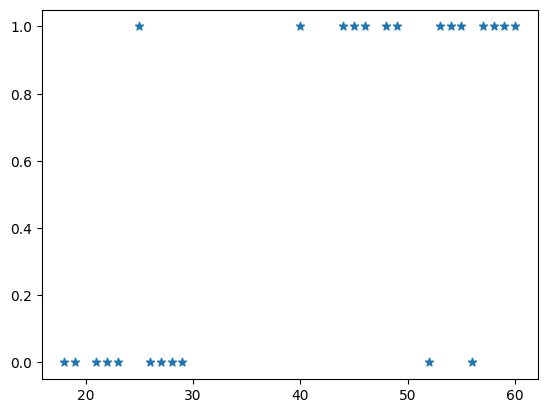

In [16]:
plt.scatter(df["age"], df["insurance"], marker="*")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df["insurance"], test_size=0.2)  # 80:20 split
X_train.head()

,age
24,60
6,26
12,45
18,54
14,48


In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
coef, intercept = (model.coef_.ravel()[0], model.intercept_.ravel()[0])
coef, intercept

(0.11357055101100227, -4.530186459617808)

In [19]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 1, 1], dtype=int64)

In [20]:
print("Score:",model.score(X_test, y_test))

Score: 1.0


In [21]:
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

def prediction_function(age):
    return sigmoid(coef * age + intercept)

In [22]:
age = 35
prediction_function(age)

0.36465483390600806

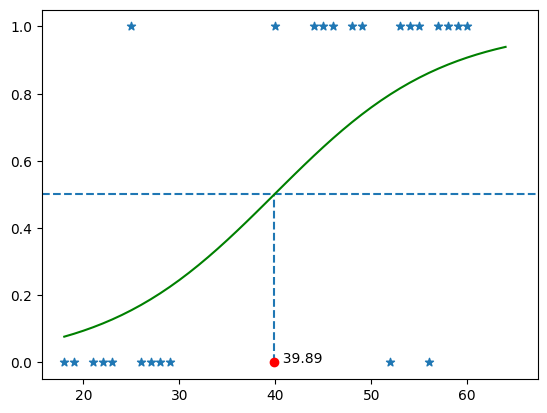

In [23]:
# Find the age at which the probability of buying insurance is 0.5
y = 0.5
intersect_x = (np.log(y / (1 - y)) - intercept) / coef

plt.scatter(df["age"], df["insurance"], marker="*")
plt.axline((20, 0.5), (65, 0.5), linestyle="--")
plt.plot((intersect_x, intersect_x), (0, 0.5), linestyle="--")
plt.text(intersect_x, 0.0, f"  {intersect_x:.2f}")
plt.plot((intersect_x), (0), "ro")
plt.plot(list(range(18, 65)), [prediction_function(i) for i in range(18, 65)], color="green")